# **Linear Regresion**

```scikit-learn``` webpage [here](https://scikit-learn.org/stable/index.html) \\
```linear_regression``` module [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression)

In [1]:
import numpy as np # Librería mateamtica
import matplotlib.pyplot as plt # plots
from sklearn.linear_model import LinearRegression # scikit-learn: libreria de IA para python

(80,)
(80,)


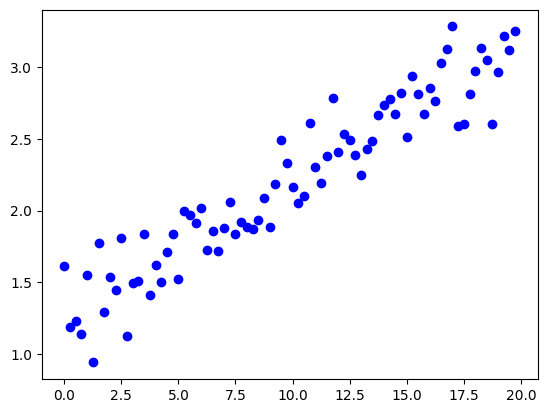

In [7]:
np.random.seed(1)

def f(x) : # Recrear el comportamiento de una funcion lineal
  y = (0.0918 * x) + 1.2859 + 0.2*np.random.randn (x.shape[0]) # Comportamiento lineal (w*x + b + ruido)
  return y

# Crear datos de entrenamiento.
x = np.arange (0, 20, 0.25); print (x.shape)
# Generar etiquetas para cada x
y = f(x) ; print (y.shape)

# Diagrama de dispersion
plt.scatter(x, y, color = 'blue')

In [8]:
# Instancia de la regresion lineal
linear_regression = LinearRegression()

# Entrenar el modelo de regresion lineal
linear_regression.fit( x.reshape(-1,1) , y.reshape(-1,1) ) # (#muestras, #caracteristicas)

# Imprimir los valores estimados para compararlos respecto a los originales
print ("w = " + str(linear_regression.coef_) + ", b = " + str(linear_regression.intercept_))

w = [[0.09622357]], b = [1.2521187]


In [10]:
# Nueva muestra. Imprime el valor correspondiente de y
new_sample = np.array([5])
print (f(new_sample))

# Predecir la nueva muestra. Imprimir la prediccion
prediction = linear_regression.predict( new_sample.reshape(-1,1) )
print (prediction)

[1.70474839]
[[1.73323654]]


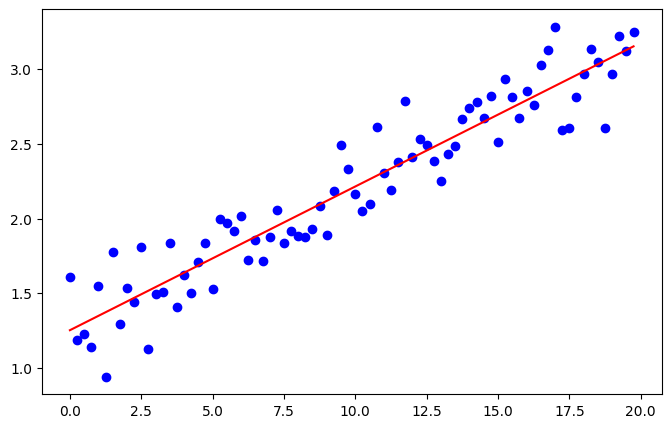

In [11]:
# Predecir todos los valores de x
predictions = linear_regression.predict(x.reshape(-1, 1))

# Dibuja los valores del las muestras (azul) y de prediccion (rojo)
_, ax = plt.subplots (figsize=(8,5))
ax.scatter(x, y, color = 'blue')
ax.plot (x, predictions, color = 'red')

## In real data

```datasets``` module info [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

In [12]:
import numpy as np
import matplotlib.pyplot as plt # plots
from sklearn.linear_model import LinearRegression # scikit-learn: libreria de IA para python
from sklearn.datasets import load_diabetes

In [19]:
# Cargar la base de datos Diabetes
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)
print(diabetes_X.shape, diabetes_y.shape)

(442, 10) (442,)


In [20]:
# Use only one feature
diabetes_X = diabetes_X[:, 2]
diabetes_X = diabetes_X[:, np.newaxis]
print(diabetes_X.shape, diabetes_y.shape)

(442, 1) (442,)


In [21]:
# Linear regression
linear_regression = LinearRegression()

# Train the model
linear_regression.fit( diabetes_X , diabetes_y )

LinearRegression()

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = linear_regression.predict( _ )


print ("w = " + str( _ ) + ", b = " + str( _ ))

In [ ]:
# Plot outputs
_, ax = plt.subplots (figsize=(8,5))
ax.scatter( _ , _ , color="blue")
ax.plot( _ , _ , color="red")

# **Logistic Regresion**

Iris dataset description [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) \\
```linear_regression``` module [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression # Regresion logistica
from sklearn.datasets import load_iris # Iris dataset

In [57]:
iris = load_iris() # Cargar la base de datos iris
iris_x = iris.data[:, 0:2] # Caracteristicas. Seleccionamos 2
iris_y = iris.target # Etiquetas
iris_names = iris.target_names
iris_features = iris.feature_names

# Imprimir formas
print (iris_x.shape, iris_y.shape, "\n", iris_names, "\n", iris_features)

(150, 2) (150,) 
 ['setosa' 'versicolor' 'virginica'] 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


AttributeError: ignored

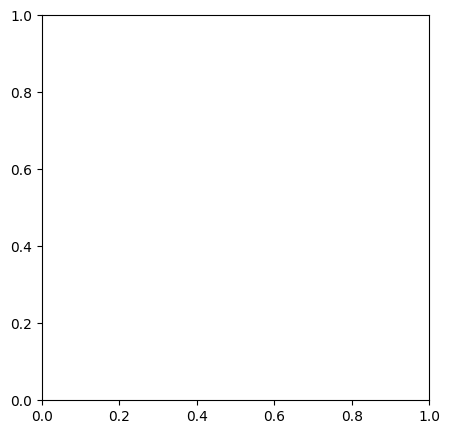

In [59]:
ax = plt.subplots(figsize=(5,5))
ax.scatter(iris_x[:,0],iris_x[:,1],c=iris_y,cmap="Paired")

In [39]:
# Instancia de la regresion logistica
logistic_regression = LogisticRegression()

# Entrenar el modelo de regresion logistica
logistic_regression.fit (iris_x, iris_y) #(#muestras, #caracteristicas)

LogisticRegression()

### **Decision boundaries**

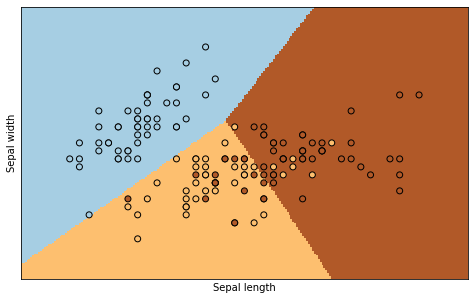

In [54]:
prec = 0.005
# Valores minimos y maximos para crear el grid de las fronteras de decision
x_min, x_max = iris_x[:, 0].min()-prec, iris_x[:, 0].max()+prec
y_min, y_max = iris_x[:, 1].min()-prec, iris_x[:, 1].max()+prec

# Crear el grid de las fronteras de decision
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, prec), np.arange(y_min, y_max, prec))

# Predecir los valores del grid
predictions = logistic_regression.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
print (predictions.shape)

(348004,)


[]

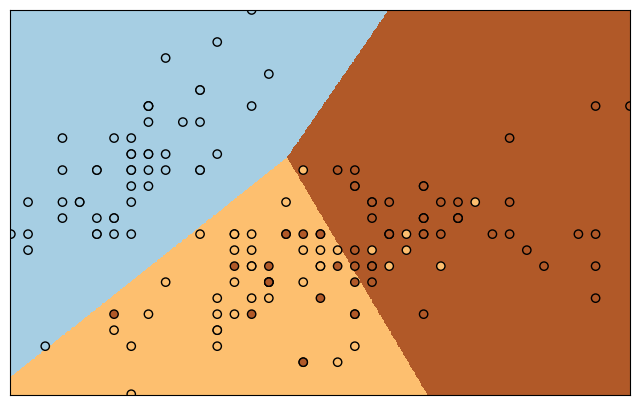

In [55]:
# Encajar las predicciones al tamaño del grid
predictions = predictions.reshape(x_grid.shape)

# Dibujar el grid y las fronteras de decision
_, ax = plt.subplots (figsize=(8,5))
ax.pcolormesh(x_grid, y_grid, predictions, cmap = plt.cm.Paired)

# Imprimir las muestras con el scatter
ax.scatter ( iris_x[:,0] , iris_x[:,1] ,  c = iris_y , edgecolors='k', cmap=plt.cm.Paired)

ax.set_xlim(x_grid.min(), x_grid.max())
ax.set_ylim(y_grid.min(), y_grid.max())

ax.set_xticks(())
ax.set_yticks(())